<a href="https://colab.research.google.com/github/nikeshgamal24/Car-Price-Prediction-Project/blob/main/Car_Price_Prediction_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings
%matplotlib inline

https://www.kaggle.com/datasets/bhavikjikadara/car-price-prediction-dataset/data

In [249]:
data = pd.read_csv("car_prediction_data.csv")

In [250]:
data.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
131,Yamaha FZ 16,2015,0.75,0.82,18000,Petrol,Individual,Manual,0
186,TVS Wego,2010,0.25,0.52,22000,Petrol,Individual,Automatic,0
272,city,2015,7.50,10.00,27600,Petrol,Dealer,Manual,0
276,city,2015,8.65,13.60,24800,Petrol,Dealer,Manual,0
224,verna,2013,5.11,9.40,36198,Petrol,Dealer,Automatic,0


In [251]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [253]:
for col in data.columns:
  print(f"Column Name: {col},   Data Type: {data[col].dtype}")
  print(f"Unique Value Count: {len(data[col].unique())}")
  print("--"*20)

Column Name: Car_Name,   Data Type: object
Unique Value Count: 98
----------------------------------------
Column Name: Year,   Data Type: int64
Unique Value Count: 16
----------------------------------------
Column Name: Selling_Price,   Data Type: float64
Unique Value Count: 156
----------------------------------------
Column Name: Present_Price,   Data Type: float64
Unique Value Count: 147
----------------------------------------
Column Name: Kms_Driven,   Data Type: int64
Unique Value Count: 206
----------------------------------------
Column Name: Fuel_Type,   Data Type: object
Unique Value Count: 3
----------------------------------------
Column Name: Seller_Type,   Data Type: object
Unique Value Count: 2
----------------------------------------
Column Name: Transmission,   Data Type: object
Unique Value Count: 2
----------------------------------------
Column Name: Owner,   Data Type: int64
Unique Value Count: 3
----------------------------------------


In [254]:
print(f"Unique Values of Fuel_Type: {data['Fuel_Type'].unique()}")
print(f"Unique Values of Seller_Type: {data['Seller_Type'].unique()}")
print(f"Unique Values of Transmission: {data['Transmission'].unique()}")
print(f"Unique Values of Owner: {data['Owner'].unique()}")

Unique Values of Fuel_Type: ['Petrol' 'Diesel' 'CNG']
Unique Values of Seller_Type: ['Dealer' 'Individual']
Unique Values of Transmission: ['Manual' 'Automatic']
Unique Values of Owner: [0 1 3]


In [255]:
## 1. Missing values
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [256]:
## 2. duplicated records
data[data.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [257]:
## Remove duplicate values from the dataset

In [258]:
data.drop_duplicates(keep="first",inplace=True)

In [259]:
data[data.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


In [260]:
## 3. DIstribution of the numerical features
numerical_features = [feature for feature in data.columns if data[feature].dtype!='O']
numerical_features

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

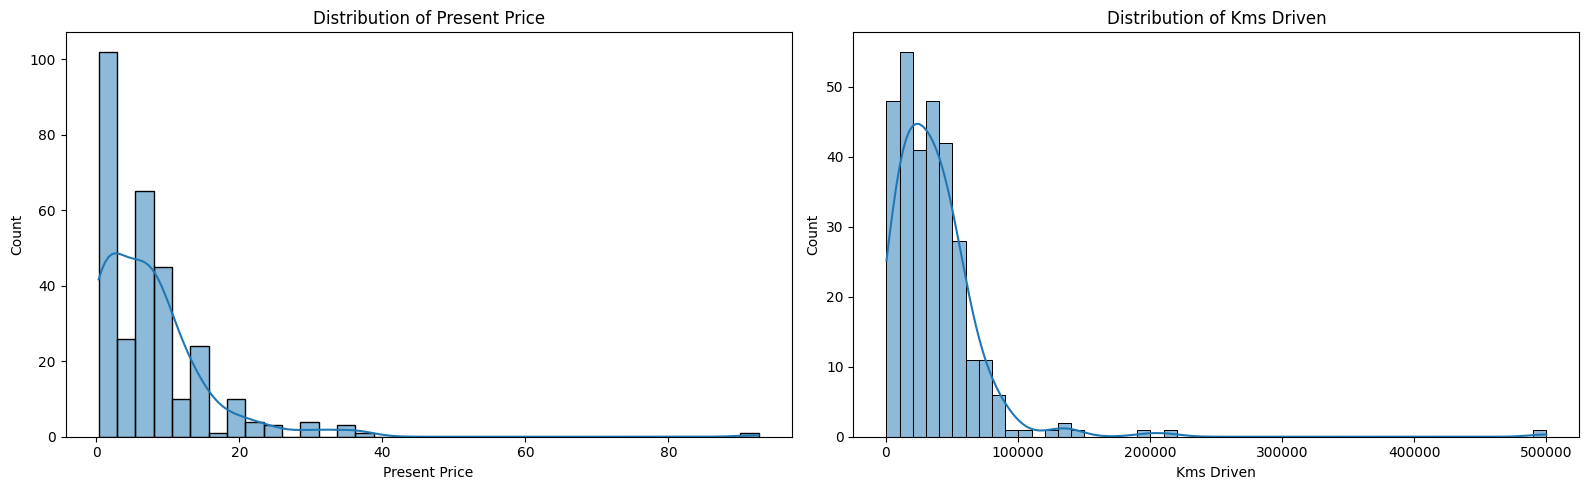

In [261]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(data["Present_Price"], kde=True)
plt.title("Distribution of Present Price") # Add a title for clarity
plt.xlabel("Present Price") # Add x-axis label

plt.subplot(1, 2, 2)
sns.histplot(data["Kms_Driven"], kde=True)
plt.title("Distribution of Kms Driven") # Add a title for clarity
plt.xlabel("Kms Driven") # Add x-axis label

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

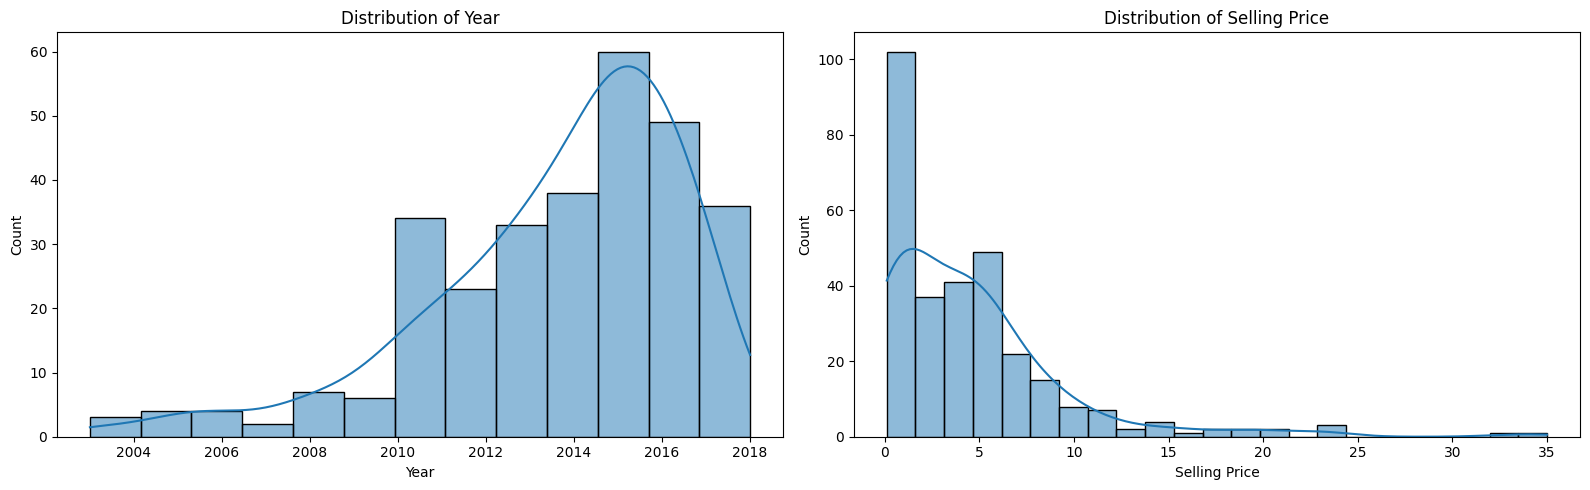

In [262]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(data["Year"], kde=True)
plt.title("Distribution of Year")
plt.xlabel("Year")

plt.subplot(1, 2, 2)
sns.histplot(data["Selling_Price"], kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.tight_layout()
plt.show()

In [263]:
data.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
55,corolla altis,2009,3.60,15.04,70000,Petrol,Dealer,Automatic,0
272,city,2015,7.50,10.00,27600,Petrol,Dealer,Manual,0
60,corolla altis,2013,6.95,18.61,40001,Petrol,Dealer,Manual,0
160,Bajaj Avenger Street 220,2011,0.45,0.95,24000,Petrol,Individual,Manual,0
143,Yamaha FZ v 2.0,2016,0.60,0.84,25000,Petrol,Individual,Manual,0


In [264]:
# Findinf Outliers of Present Price, Selling Price and KMs Driven
data["Kms_Driven"].skew(), data["Present_Price"].skew(), data["Selling_Price"].skew()

(np.float64(6.418134387971488),
 np.float64(4.186894223914912),
 np.float64(2.536521826497541))

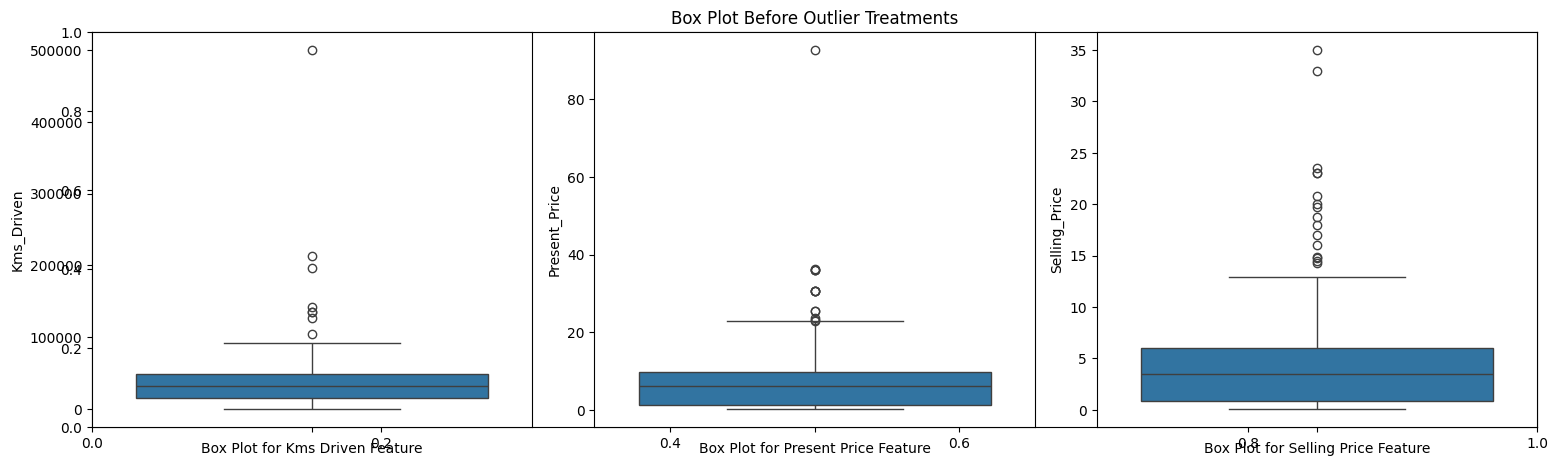

In [265]:
plt.figure(figsize=(16, 5))
plt.title("Box Plot Before Outlier Treatments")


plt.subplot(1, 3, 1)
sns.boxplot(data["Kms_Driven"])
plt.xlabel("Box Plot for Kms Driven Feature")

plt.subplot(1, 3, 2)
sns.boxplot(data["Present_Price"])
plt.xlabel("Box Plot for Present Price Feature")

plt.subplot(1, 3, 3)
sns.boxplot(data["Selling_Price"])
plt.xlabel("Box Plot for Selling Price Feature")

plt.tight_layout()
plt.show()

In [266]:
numerical_features

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [267]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [268]:
new_data_df = data.copy()

for feature in numerical_features:
  if feature != 'Year' and feature != 'Owner':
    q1 = new_data_df[feature].quantile(0.25)
    q3 = new_data_df[feature].quantile(0.75)

    iqr = q3 - q1

    ## upper_limit and lower_limit values calculation
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    print(f"Feature Name: {feature}")
    print(f"Q1: {q1}")
    print(f"Q3: {q3}")
    print(f"IQR: {iqr}")
    print(f"Upper Boundary Value: {upper_limit}")
    print(f"Lower Boundar Value: {lower_limit}")
    print('--'*20)


Feature Name: Selling_Price
Q1: 0.8500000000000001
Q3: 6.0
IQR: 5.15
Upper Boundary Value: 13.725000000000001
Lower Boundar Value: -6.875
----------------------------------------
Feature Name: Present_Price
Q1: 1.2
Q3: 9.84
IQR: 8.64
Upper Boundary Value: 22.8
Lower Boundar Value: -11.760000000000002
----------------------------------------
Feature Name: Kms_Driven
Q1: 15000.0
Q3: 48883.5
IQR: 33883.5
Upper Boundary Value: 99708.75
Lower Boundar Value: -35825.25
----------------------------------------


In [269]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [270]:
new_data_df_capped = data.copy()
for feature in numerical_features:
  if feature != 'Year' and feature != 'Owner':
    q1 = new_data_df_capped[feature].quantile(0.25)
    q3 = new_data_df_capped[feature].quantile(0.75)

    iqr = q3 - q1

    ## upper_limit and lower_limit values calculation
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    new_data_df_capped[feature] = np.where(
        new_data_df_capped[feature] > upper_limit,
        upper_limit,
        np.where(
            new_data_df_capped[feature] < lower_limit,
            lower_limit,
            new_data_df_capped[feature]
        )
    )


In [271]:
new_data_df_trim = data.copy()
for feature in numerical_features:
  if feature != 'Year' and feature != 'Owner':
    q1 = new_data_df_trim[feature].quantile(0.25)
    q3 = new_data_df_trim[feature].quantile(0.75)

    iqr = q3 - q1

    ## upper_limit and lower_limit values calculation
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    new_data_df_trim = new_data_df_trim[(new_data_df_trim[feature] < upper_limit) & \
                                     (new_data_df_trim[feature] > lower_limit)].copy()

In [272]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [273]:
new_data_df_capped.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.233378,7.004448,34387.096990,0.043478
std,2.896868,3.727106,6.092974,23819.913773,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,13.725000,22.800000,99708.750000,3.000000


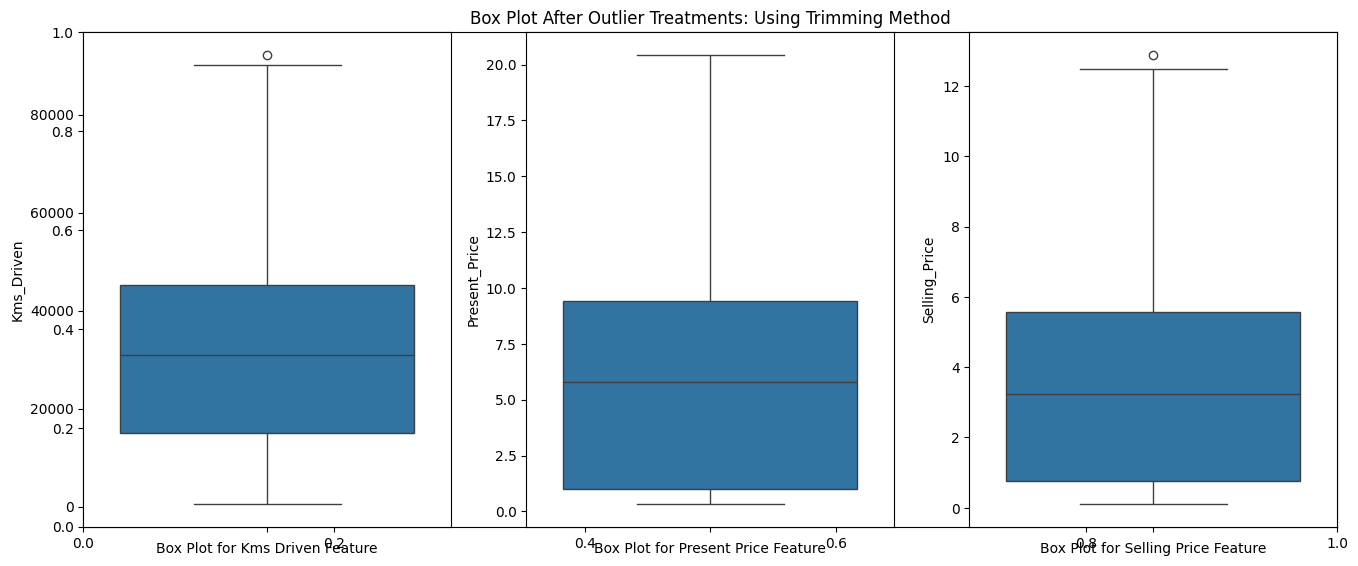

In [274]:
plt.figure(figsize=(14, 6))
plt.title("Box Plot After Outlier Treatments: Using Trimming Method")

plt.subplot(1, 3, 1)
sns.boxplot(new_data_df_trim["Kms_Driven"])
plt.xlabel("Box Plot for Kms Driven Feature")

plt.subplot(1, 3, 2)
sns.boxplot(new_data_df_trim["Present_Price"])
plt.xlabel("Box Plot for Present Price Feature")

plt.subplot(1, 3, 3)
sns.boxplot(new_data_df_trim["Selling_Price"])
plt.xlabel("Box Plot for Selling Price Feature")

plt.tight_layout()
plt.show()

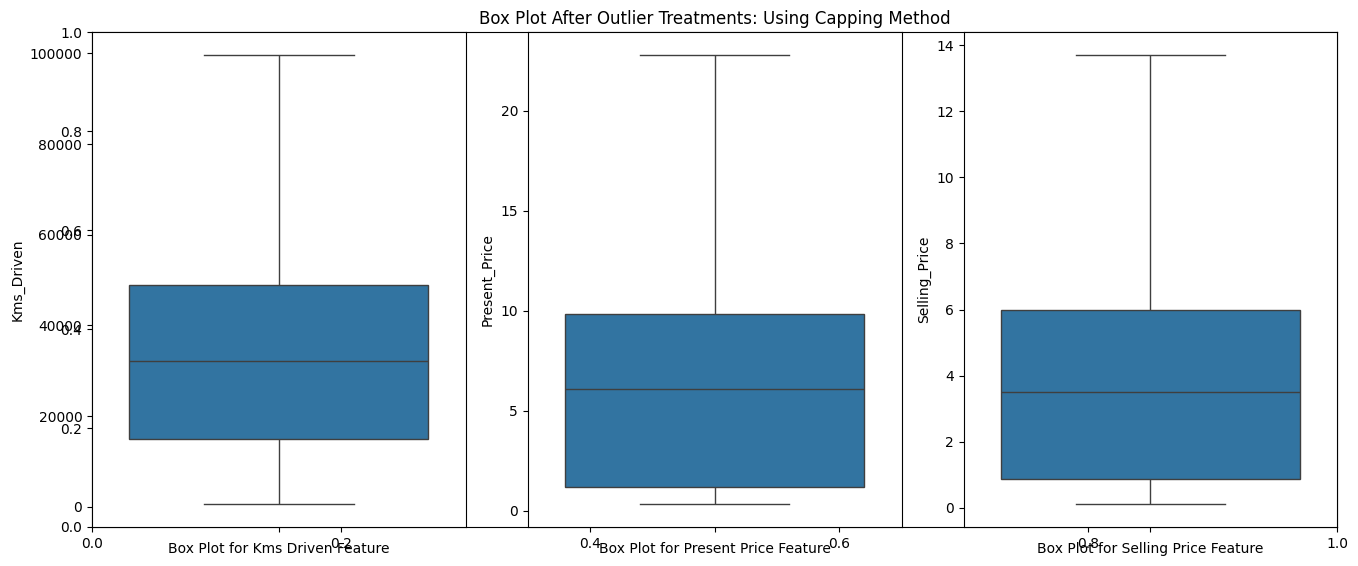

In [275]:
plt.figure(figsize=(14, 6))
plt.title("Box Plot After Outlier Treatments: Using Capping Method")

plt.subplot(1, 3, 1)
sns.boxplot(new_data_df_capped["Kms_Driven"])
plt.xlabel("Box Plot for Kms Driven Feature")

plt.subplot(1, 3, 2)
sns.boxplot(new_data_df_capped["Present_Price"])
plt.xlabel("Box Plot for Present Price Feature")

plt.subplot(1, 3, 3)
sns.boxplot(new_data_df_capped["Selling_Price"])
plt.xlabel("Box Plot for Selling Price Feature")

plt.tight_layout()
plt.show()

------------------------------------------------------------
Histograms Before Outliers Treatment
------------------------------------------------------------


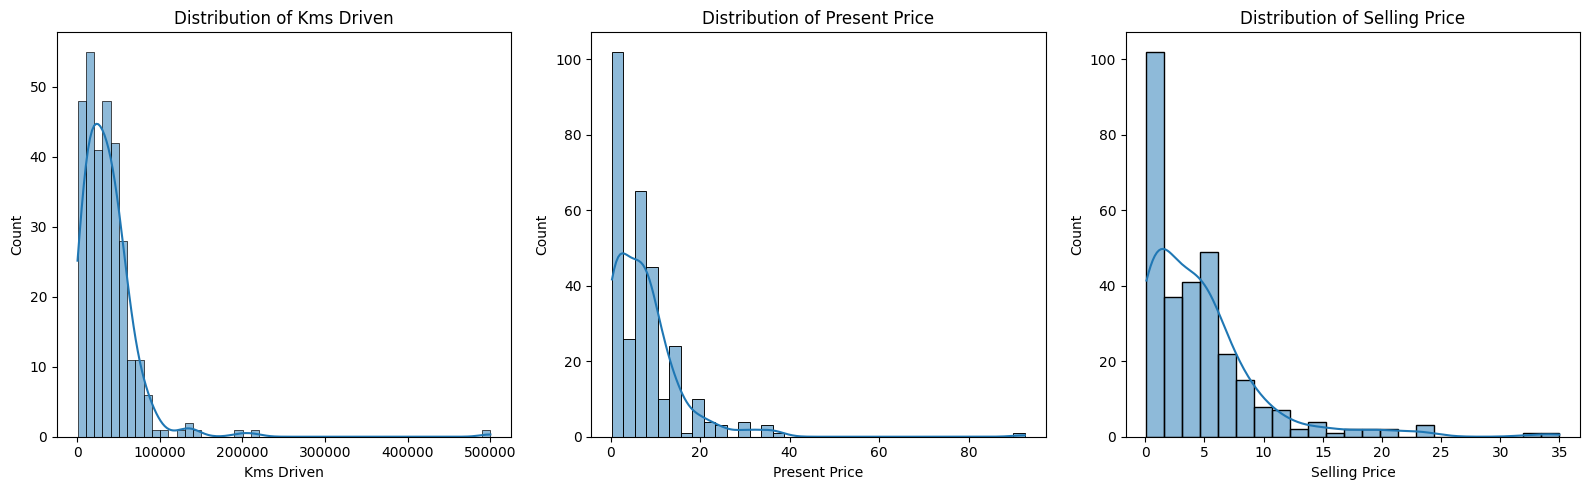

In [276]:
print("--"*30)
print("Histograms Before Outliers Treatment")
print("--"*30)

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(data["Kms_Driven"], kde=True)
plt.title("Distribution of Kms Driven")
plt.xlabel("Kms Driven")

plt.subplot(1, 3, 2)
sns.histplot(data["Present_Price"], kde=True)
plt.title("Distribution of Present Price")
plt.xlabel("Present Price")

plt.subplot(1, 3, 3)
sns.histplot(data["Selling_Price"], kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.tight_layout()
plt.show()

------------------------------------------------------------------------------------------------------------------------
Histograms After Outliers Treatment using Capping Method
------------------------------------------------------------------------------------------------------------------------


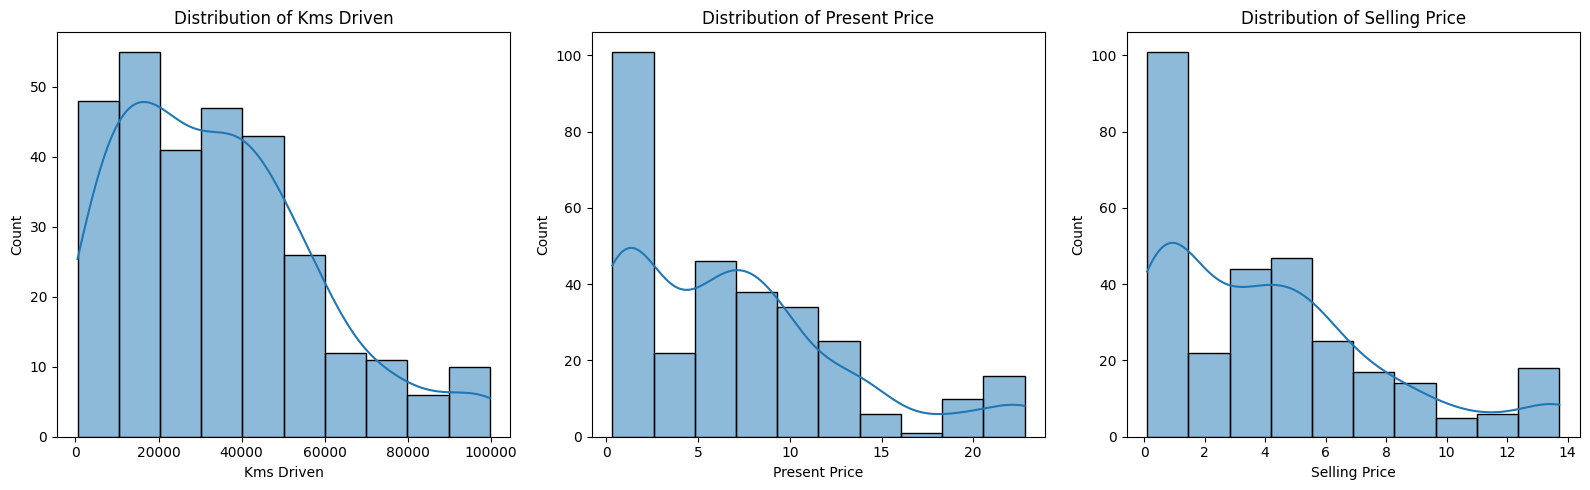

In [277]:
print("----"*30)
print("Histograms After Outliers Treatment using Capping Method")
print("----"*30)
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(new_data_df_capped["Kms_Driven"], kde=True)
plt.title("Distribution of Kms Driven")
plt.xlabel("Kms Driven")

plt.subplot(1, 3, 2)
sns.histplot(new_data_df_capped["Present_Price"], kde=True)
plt.title("Distribution of Present Price")
plt.xlabel("Present Price")

plt.subplot(1, 3, 3)
sns.histplot(new_data_df_capped["Selling_Price"], kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.tight_layout()
plt.show()

------------------------------------------------------------------------------------------------------------------------
Histograms After Outliers Treatment using Trimming Method
------------------------------------------------------------------------------------------------------------------------


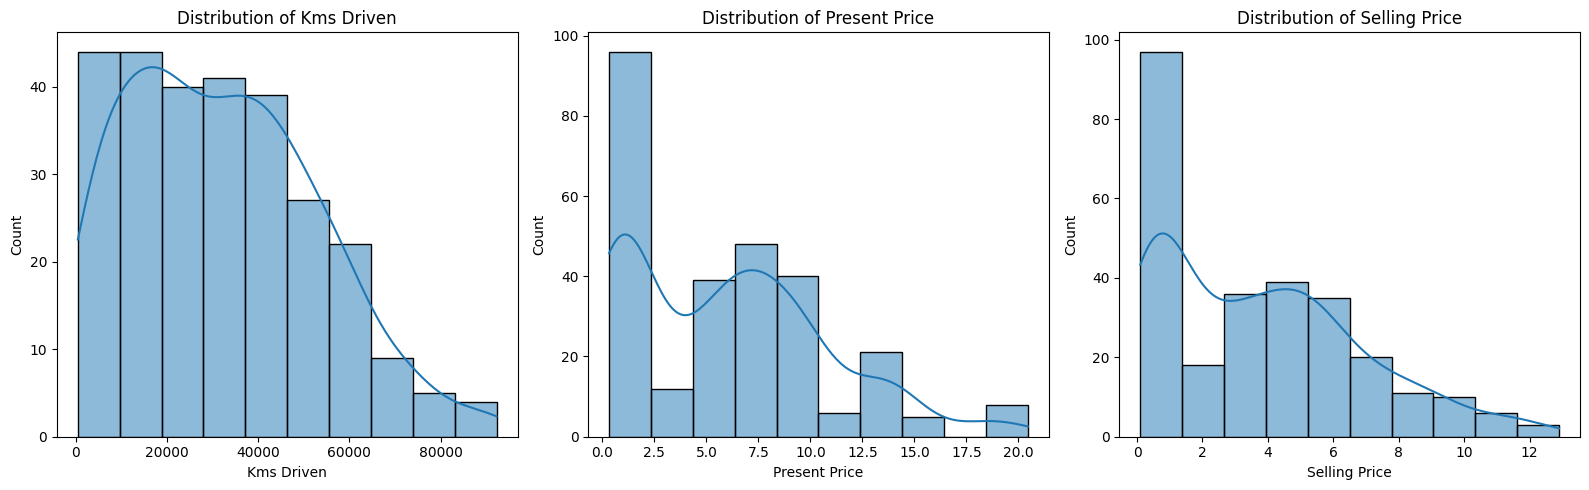

In [278]:
print("----"*30)
print("Histograms After Outliers Treatment using Trimming Method")
print("----"*30)
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(new_data_df_trim["Kms_Driven"], kde=True)
plt.title("Distribution of Kms Driven")
plt.xlabel("Kms Driven")

plt.subplot(1, 3, 2)
sns.histplot(new_data_df_trim["Present_Price"], kde=True)
plt.title("Distribution of Present Price")
plt.xlabel("Present Price")

plt.subplot(1, 3, 3)
sns.histplot(new_data_df_trim["Selling_Price"], kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.tight_layout()
plt.show()